In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youth-tobacco-survey-yts-data-usa/Youth_Tobacco_Survey__YTS__Data.csv


In [129]:
youth_tobacco = pd.read_csv("/kaggle/input/youth-tobacco-survey-yts-data-usa/Youth_Tobacco_Survey__YTS__Data.csv")
youth_tobacco.shape
youth_tobacco
#What's my data looking like?

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,2002,KS,Kansas,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.3477403, -98.200781227)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
10596,2015,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS09,9
10597,2010,WI,Wisconsin,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6
10598,2009,LA,Louisiana,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(31.312660644, -92.445680071)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7


In [130]:
youth_tobacco.loc[:, ['YEAR', 'TopicDesc', 'Response', 'Data_Value']]
#I just want to see these four columns.

,YEAR,TopicDesc,Response,Data_Value
0,2004,Cigarette Use (Youth),Ever,32.2
1,2008,Cigarette Use (Youth),Ever,47.8
2,2015,Smokeless Tobacco Use (Youth),Frequent,12.7
3,2005,Cigarette Use (Youth),Ever,28.5
4,2005,Smokeless Tobacco Use (Youth),Ever,20.5
...,...,...,...,...
10595,2002,Smokeless Tobacco Use (Youth),Frequent,0.3
10596,2015,Cigarette Use (Youth),Frequent,2.7
10597,2010,Cessation (Youth),NaN,NaN
10598,2009,Cigarette Use (Youth),Current,10.1


In [131]:
sorted_data = youth_tobacco.loc[:, ['YEAR', 'TopicDesc', 'Response', 'Data_Value']].sort_values(by='YEAR')
sorted_data
#I wonder if youth tobacco use is going down? I want to create a graph of this later.

,YEAR,TopicDesc,Response,Data_Value
4832,1999,Cessation (Youth),NaN,53.1
3416,1999,Cigarette Use (Youth),Current,15.8
8249,1999,Smokeless Tobacco Use (Youth),Ever,24.5
7239,1999,Cigarette Use (Youth),Current,28.4
1439,1999,Smokeless Tobacco Use (Youth),Ever,42.3
...,...,...,...,...
9421,2017,Cigarette Use (Youth),Ever,8.1
9422,2017,Cigarette Use (Youth),Current,6.2
9423,2017,Cigarette Use (Youth),Current,1.1
9408,2017,Cigarette Use (Youth),Ever,9.0


In [132]:
sample_size_range = youth_tobacco['Sample_Size'].describe()
print(sample_size_range)
#The sample sizes of these studies range from 50 to almost 37,000! 
#The mean is 1,483. I am going to get rid of the studies with sample sizes of less than 500.
#What else should I get rid of? Are all these studies measuring the same thing?
#They're not; some of them are asking about smoking cessation rather than if someone smokes.

count    10080.000000
mean      1483.412897
std       2189.565233
min         50.000000
25%        671.000000
50%       1001.000000
75%       1642.000000
max      36910.000000
Name: Sample_Size, dtype: float64


In [133]:
youth_tobacco.loc[youth_tobacco.TopicDesc == "Cessation (Youth)"]
#This dataframe has 2410 rows. The original has 10600, so it means around 
#23 percent of the studies measured cessation.

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
10,2015,LA,Louisiana,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(31.312660644, -92.445680071)",BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
15,2008,MN,Minnesota,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,"(46.355648736, -94.794200503)",BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
19,2011,NH,New Hampshire,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,"(43.655950113, -71.50036092)",BEH,105BEH,170CES,1GEN,8AGE,6RAC,2EDU,YTS01,1
21,2005,IL,Illinois,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,105BEH,169QUA,2GEN,8AGE,6RAC,2EDU,YTS05,5
25,2001,GA,Georgia,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(32.839681093, -83.627580346)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,2002,MN,Minnesota,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(46.355648736, -94.794200503)",BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
10589,2008,PA,Pennsylvania,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,"(40.793730152, -77.860700294)",BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
10592,2010,WI,Wisconsin,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,105BEH,169QUA,2GEN,8AGE,6RAC,2EDU,YTS05,5
10594,2000,KY,Kentucky,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,"(37.645970271, -84.774971048)",BEH,105BEH,170CES,3GEN,8AGE,6RAC,2EDU,YTS03,3


In [134]:
filtered_yt = youth_tobacco.loc[(youth_tobacco['Sample_Size'] >= 500) & (youth_tobacco['TopicDesc'] != 'Cessation (Youth)')]
filtered_yt
#I just want to see the studies that asked about cigarette and smokeless tobacco use, not cessation,
#and I want to see only studies with sample sizes larger than 500.

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,2015,HI,Hawaii,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Current,%,Percentage,...,"(21.304850435, -157.857749403)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS10,10
10595,2002,KS,Kansas,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.3477403, -98.200781227)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
10596,2015,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS09,9
10598,2009,LA,Louisiana,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(31.312660644, -92.445680071)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7


In [135]:
simple_yt = filtered_yt.drop(columns=['Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TopicType', 'DataSource', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID', 'DisplayOrder'])
simple_yt
#I am getting rid of some columns I don't need.

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,32.2,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,47.8,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,12.7,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,28.5,2.2,24.2,32.8,1323.0,Overall,All Races,All Ages,Middle School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,%,Percentage,20.5,2.3,16.0,25.1,973.0,Male,All Races,All Ages,High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,2015,HI,Hawaii,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,3.8,0.8,2.2,5.3,904.0,Male,All Races,All Ages,High School
10595,2002,KS,Kansas,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,0.3,0.2,0.0,0.6,1481.0,Overall,All Races,All Ages,Middle School
10596,2015,IL,Illinois,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,2.7,0.7,1.3,4.1,1190.0,Male,All Races,All Ages,High School
10598,2009,LA,Louisiana,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,10.1,1.4,7.4,12.8,879.0,Female,All Races,All Ages,Middle School


In [136]:
smokeless = simple_yt.loc[(simple_yt['TopicDesc'] == 'Smokeless Tobacco Use (Youth)')]
smokeless
#I would like to see just the smokeless tobacco use studies in one dataframe.

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,12.7,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,%,Percentage,20.5,2.3,16.0,25.1,973.0,Male,All Races,All Ages,High School
5,2009,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,1.2,0.3,0.6,1.8,2214.0,Overall,All Races,All Ages,High School
6,2001,ID,Idaho,Smokeless Tobacco Use (Youth),User Status,Ever,%,Percentage,15.1,1.2,12.7,17.6,926.0,Male,All Races,All Ages,Middle School
13,2006,PA,Pennsylvania,Smokeless Tobacco Use (Youth),User Status,Ever,%,Percentage,6.2,0.8,4.6,7.8,716.0,Female,All Races,All Ages,Middle School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,2000,IN,Indiana,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,2.7,0.7,1.4,4.0,1409.0,Overall,All Races,All Ages,High School
10590,2009,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,3.1,0.7,1.7,4.5,837.0,Male,All Races,All Ages,Middle School
10591,2007,ND,North Dakota,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,10.2,1.1,8.1,12.3,1670.0,Overall,All Races,All Ages,High School
10593,2015,HI,Hawaii,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,3.8,0.8,2.2,5.3,904.0,Male,All Races,All Ages,High School


In [137]:
cigarette = simple_yt.loc[(simple_yt['TopicDesc'] == 'Cigarette Use (Youth)')]
cigarette
#I will make a similar dataframe for just the studies about cigarette use.

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,32.2,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,47.8,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,28.5,2.2,24.2,32.8,1323.0,Overall,All Races,All Ages,Middle School
7,2004,VT,Vermont,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,2.5,0.7,1.3,3.8,847.0,Male,All Races,All Ages,Middle School
8,2007,CT,Connecticut,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,13.0,1.7,9.6,16.4,2184.0,Overall,All Races,All Ages,Middle School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10579,2008,IA,Iowa,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,8.4,1.5,5.5,11.3,1245.0,Overall,All Races,All Ages,High School
10582,2004,NM,New Mexico,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,11.4,1.5,8.4,14.3,800.0,Male,All Races,All Ages,Middle School
10596,2015,IL,Illinois,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,2.7,0.7,1.3,4.1,1190.0,Male,All Races,All Ages,High School
10598,2009,LA,Louisiana,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,10.1,1.4,7.4,12.8,879.0,Female,All Races,All Ages,Middle School


In [138]:
#Unfortunately, the studies are not all asking the same question. Some ask if the respondent 
#has ever smoked, currently smokes, or frequently smokes.
#Let's see how many of each of those studies there are. I will use the simple_yt frame again.
simple_yt.Response.value_counts()

Response
Frequent    2706
Current     2706
Ever        2691
Name: count, dtype: int64

In [139]:
#I want to see just the smokeless tobacco users who use it "Currently" or "Frequently."
#I am not interested in youth who just tried it once or tried it and quit.
smokeless_cf = smokeless.loc[(smokeless['Response'] != 'Ever')]
smokeless_cf

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,12.7,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School
5,2009,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,1.2,0.3,0.6,1.8,2214.0,Overall,All Races,All Ages,High School
14,2003,UT,Utah,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,0.6,0.4,0.0,1.3,1222.0,Female,All Races,All Ages,High School
18,2011,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,5.0,0.9,3.3,6.7,2084.0,Overall,All Races,All Ages,High School
31,2007,NH,New Hampshire,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,12.4,1.5,9.4,15.4,757.0,Male,All Races,All Ages,High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,2000,IN,Indiana,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,2.7,0.7,1.4,4.0,1409.0,Overall,All Races,All Ages,High School
10590,2009,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,%,Percentage,3.1,0.7,1.7,4.5,837.0,Male,All Races,All Ages,Middle School
10591,2007,ND,North Dakota,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,10.2,1.1,8.1,12.3,1670.0,Overall,All Races,All Ages,High School
10593,2015,HI,Hawaii,Smokeless Tobacco Use (Youth),User Status,Current,%,Percentage,3.8,0.8,2.2,5.3,904.0,Male,All Races,All Ages,High School


In [140]:
#Same for cigarette users.
cigarette_cf = cigarette.loc[(cigarette['Response'] != 'Ever')]
cigarette_cf

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
7,2004,VT,Vermont,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,2.5,0.7,1.3,3.8,847.0,Male,All Races,All Ages,Middle School
11,2008,PA,Pennsylvania,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,1.0,0.3,0.5,1.5,1184.0,Male,All Races,All Ages,Middle School
20,2002,MA,Massachusetts,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,9.8,1.4,7.2,12.5,813.0,Male,All Races,All Ages,High School
22,2010,AL,Alabama,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,5.6,1.0,3.6,7.6,678.0,Female,All Races,All Ages,High School
23,2010,AR,Arkansas,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,6.9,0.7,5.5,8.3,2387.0,Overall,All Races,All Ages,Middle School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,2004,IA,Iowa,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,19.5,1.6,16.4,22.6,1749.0,Overall,All Races,All Ages,High School
10579,2008,IA,Iowa,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,8.4,1.5,5.5,11.3,1245.0,Overall,All Races,All Ages,High School
10582,2004,NM,New Mexico,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,11.4,1.5,8.4,14.3,800.0,Male,All Races,All Ages,Middle School
10596,2015,IL,Illinois,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,2.7,0.7,1.3,4.1,1190.0,Male,All Races,All Ages,High School


In [159]:
smokeless.Data_Value.mean
#Over the years 1999-2017, what is the mean percentage of youth who 'currently' or 'frequently' use
#smokeless tobacco?

<bound method Series.mean of 2        12.7
4        20.5
5         1.2
6        15.1
13        6.2
         ... 
10588     2.7
10590     3.1
10591    10.2
10593     3.8
10595     0.3
Name: Data_Value, Length: 4042, dtype: float64>

In [158]:
cigarette.Data_Value.mean
#Over the years 1999-2017, the mean percentage of youth who use cigarettes--including those who
#just tried it once--has been more than double the percentage of youth who use smokeless tobacco.
#But we are looking at an 18-year span, and I want to see the number over time in a visual way!

<bound method Series.mean of 0        32.2
1        47.8
3        28.5
7         2.5
8        13.0
         ... 
10579     8.4
10582    11.4
10596     2.7
10598    10.1
10599    45.8
Name: Data_Value, Length: 4061, dtype: float64>

In [143]:
cigarette.sort_values(by='YEAR')
#I can sort the studies so the years are in ascending order, but I still want to see a visual.

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
3874,1999,MS,Mississippi,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,5.9,1.0,4.0,7.8,890.0,Male,All Races,All Ages,Middle School
324,1999,TN,Tennessee,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,71.9,3.0,66.0,77.8,706.0,Female,All Races,All Ages,High School
9721,1999,TN,Tennessee,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,72.9,2.0,68.9,76.9,1438.0,Overall,All Races,All Ages,High School
6807,1999,NE,Nebraska,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,9.8,1.2,7.5,12.1,1602.0,Female,All Races,All Ages,Middle School
332,1999,TN,Tennessee,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,47.3,3.2,41.0,53.6,622.0,Male,All Races,All Ages,Middle School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,2017,ND,North Dakota,Cigarette Use (Youth),Smoking Status,Current,%,Percentage,2.0,0.4,1.2,2.8,1118.0,Male,All Races,All Ages,Middle School
9382,2017,MO,Missouri,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,0.5,0.3,0.0,1.1,1799.0,Overall,All Races,All Ages,Middle School
9376,2017,SC,South Carolina,Cigarette Use (Youth),Smoking Status,Frequent,%,Percentage,0.6,0.3,0.1,1.1,1352.0,Overall,All Races,All Ages,Middle School
9415,2017,MS,Mississippi,Cigarette Use (Youth),Smoking Status,Ever,%,Percentage,11.3,1.5,8.3,14.3,749.0,Female,All Races,All Ages,Middle School


In [144]:
smokeless3 = smokeless.loc[:, ['YEAR', 'Data_Value']]
smokeless3 = smokeless3.rename(columns={'Data_Value': 'Smokeless'})
smokeless3 = smokeless3.sort_values(by='YEAR')
smokeless3 = smokeless3.set_index('YEAR')
cigarette3 = cigarette.loc[:, ['YEAR', 'Data_Value']]
cigarette3 = cigarette3.rename(columns={'Data_Value': 'Cigarette'})
cigarette3 = cigarette3.sort_values(by='YEAR')
cigarette3 = cigarette3.set_index('YEAR')

joined_df = pd.merge(cigarette3, smokeless3, left_index=True, right_index=True, how='inner')
joined_df

#I wanted to join the two dataframes, showing smokeless tobacco use and cigarette use, into one
#dataframe with the same index (YEAR). But I realized that the years don't make sense because 
#for a given year, there could be a number of studies that asked about smokeless tobacco use
#(in various states) and a number of studies that asked about tobacco use. There are not just
#one or two studies per year.
#Anyway, let's see how it looks and what a mess it is.

,Cigarette,Smokeless
YEAR,,
1999,5.9,9.6
1999,5.9,4.8
1999,5.9,8.1
1999,5.9,10.1
1999,5.9,0.4
...,...,...
2017,2.4,29.8
2017,2.4,3.9
2017,2.4,24.9


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Smokeless Tobacco Use among Middle and High School Students, 1999-2017'}, xlabel='YEAR'>

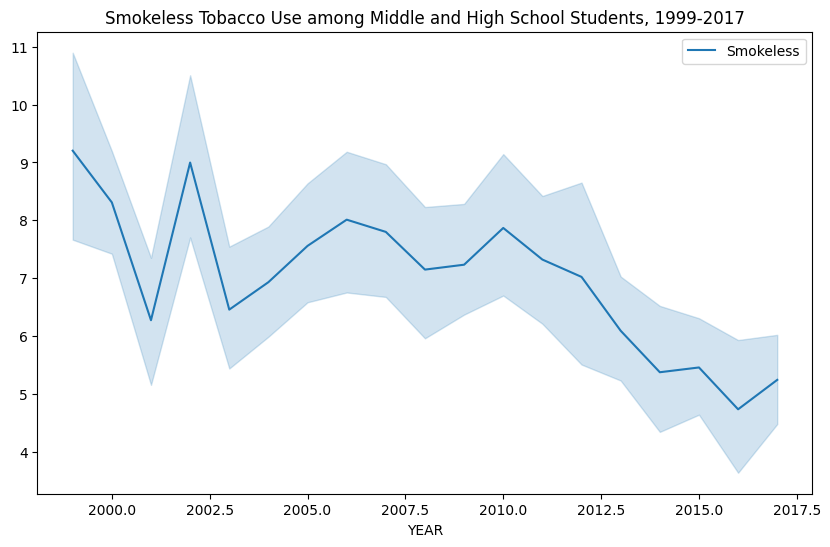

In [145]:
plt.figure(figsize=(10,6))
plt.title("Smokeless Tobacco Use among Middle and High School Students, 1999-2017")
sns.lineplot(data=smokeless3)
#In this simple line chart, I can see that smokeless tobacco use is generally trending down,
#although it increased in popularity around 2001-2002 and from 2002-2005.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Cigarette Use among Middle and High School Students, 1999-2017'}, xlabel='YEAR'>

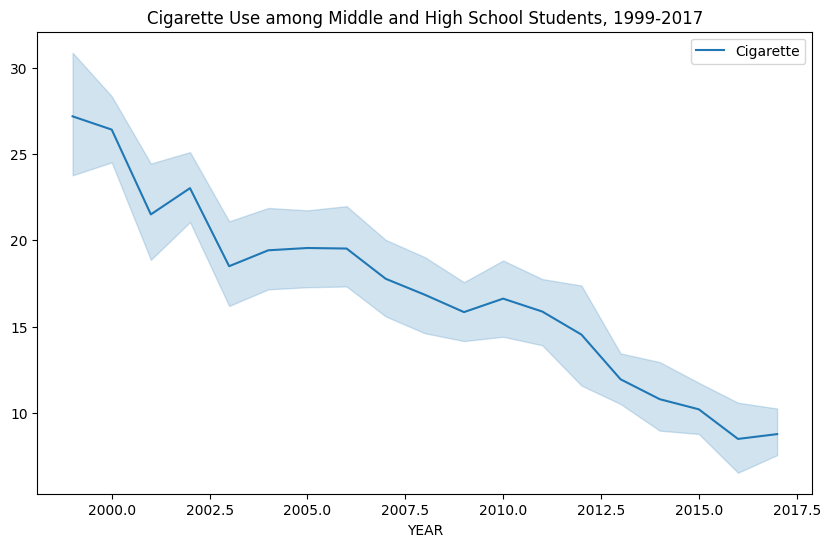

In [146]:
plt.figure(figsize=(10,6))
plt.title("Cigarette Use among Middle and High School Students, 1999-2017")
sns.lineplot(data=cigarette3)
#Cigarette use is trending down much more markedly.
#I really wanted these two lines overlaid on one chart! But since merging the dataframes did not
#go so well, I don't know how to do that.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='YEAR'>

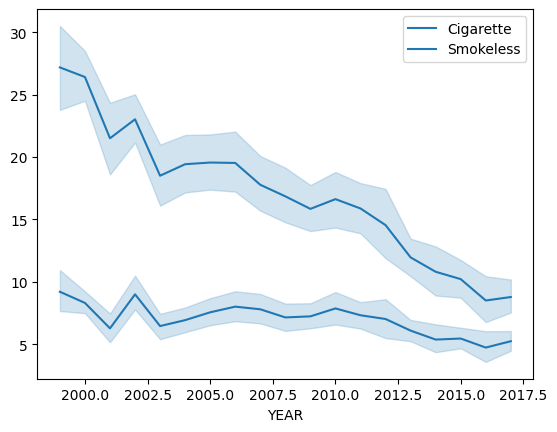

In [147]:
sns.lineplot(data=cigarette3)
sns.lineplot(data=smokeless3)

#As it turns out, it's a lot easier to put them into one graph than I expected.
#I did this by accident the first time! I like that I can see the range for each year. 
#But the colors are the same, so I only know that the line representing cigarette use is the higher
#one because I already looked at the data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YEAR'>

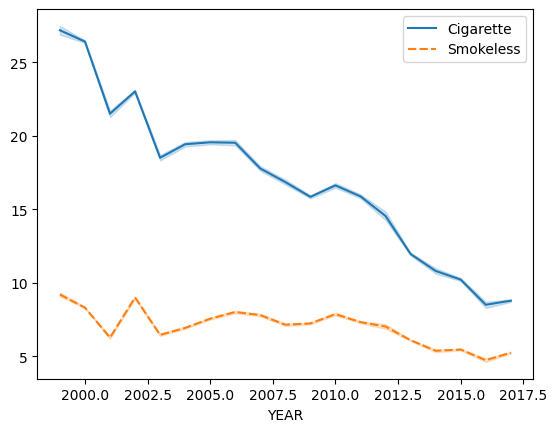

In [148]:
sns.lineplot(data=joined_df)
#When I use the joined dataframe, I can't see the range of values (representing multiple studies in one year).
#I'm not sure why that is! Does Python automatically use the mean of the values for that year...?
#At least, I can see that cigarette use is still higher than smokeless tobacco use--but remember,
#we're looking at students who have EVER used them, not necessarily currently or frequently.